In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


**Load Data**

In [ ]:
Data = pd.read_csv('/drive/MyDrive/deeplearning/Churn.csv')


FileNotFoundError: ignored

 **Overview**

In [ ]:
Data.shape


(10000, 14)

In [ ]:
Data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Data.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
Data.duplicated().sum()


0

In [ ]:
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)


RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

No Null and duplicates

In [ ]:
Data["Exited"].value_counts(1)


0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
Data.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
Data.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:

for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


Data Preprocessing

In [ ]:
Data.drop(columns="RowNumber", inplace=True)

In [ ]:
Data.drop(columns="CustomerId", inplace=True)

EDA

Univariative Analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
Data.dtypes


Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

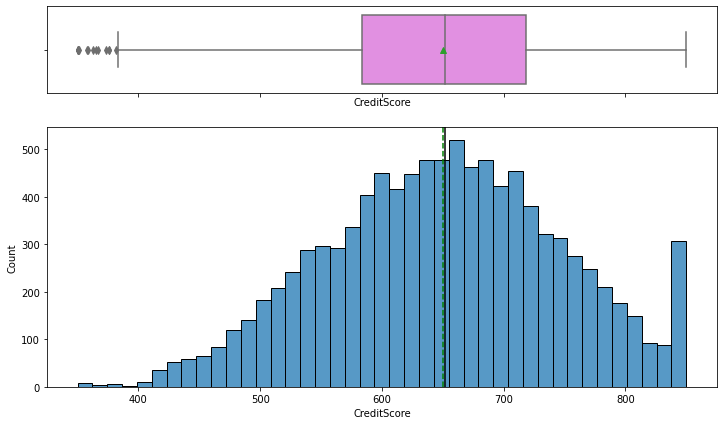

In [ ]:
histogram_boxplot(Data, "CreditScore")


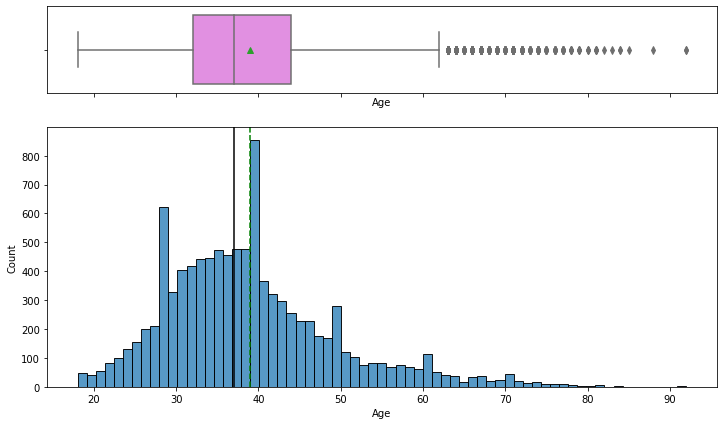

In [ ]:
histogram_boxplot(Data, "Age")


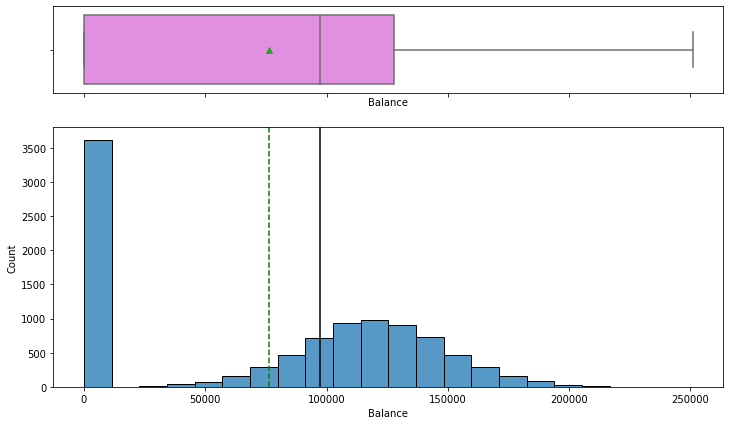

In [ ]:
histogram_boxplot(Data, "Balance")


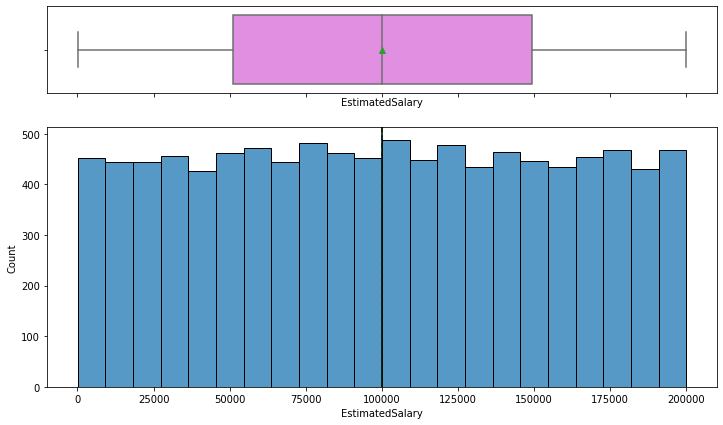

In [ ]:
histogram_boxplot(Data, "EstimatedSalary")


In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

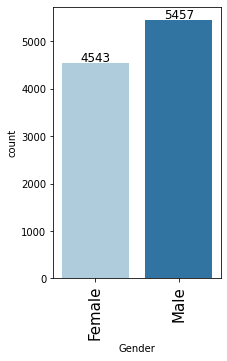

In [ ]:
labeled_barplot(Data, "Gender")


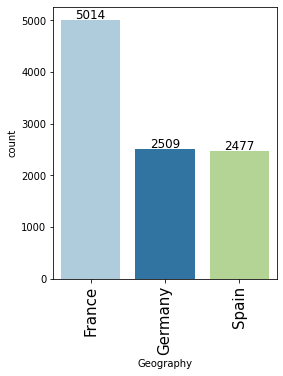

In [ ]:
labeled_barplot(Data, "Geography")


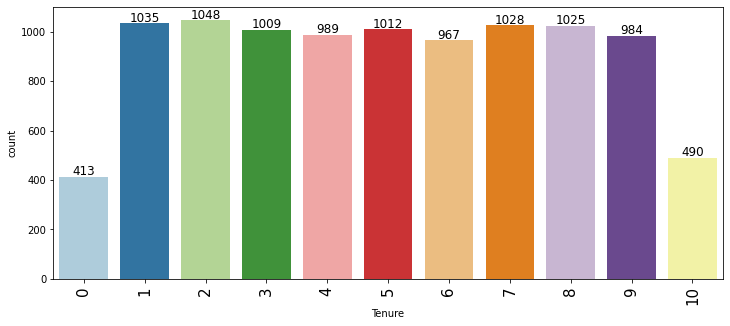

In [ ]:
labeled_barplot(Data, "Tenure")


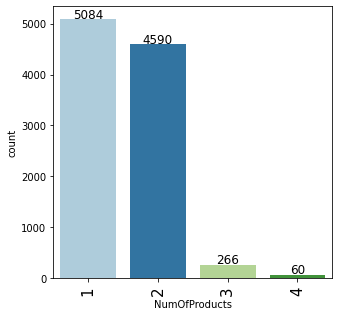

In [ ]:
labeled_barplot(Data, "NumOfProducts")


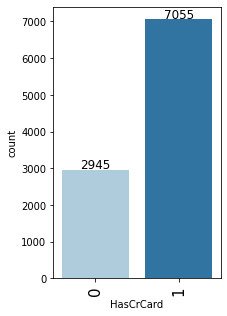

In [ ]:
labeled_barplot(Data, "HasCrCard")


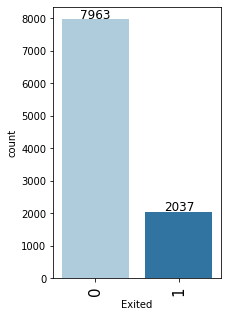

In [ ]:
labeled_barplot(Data, "Exited")


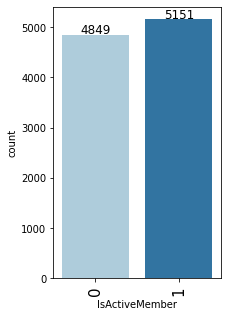

In [ ]:
labeled_barplot(Data, "IsActiveMember")


Bivariate Analysis

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

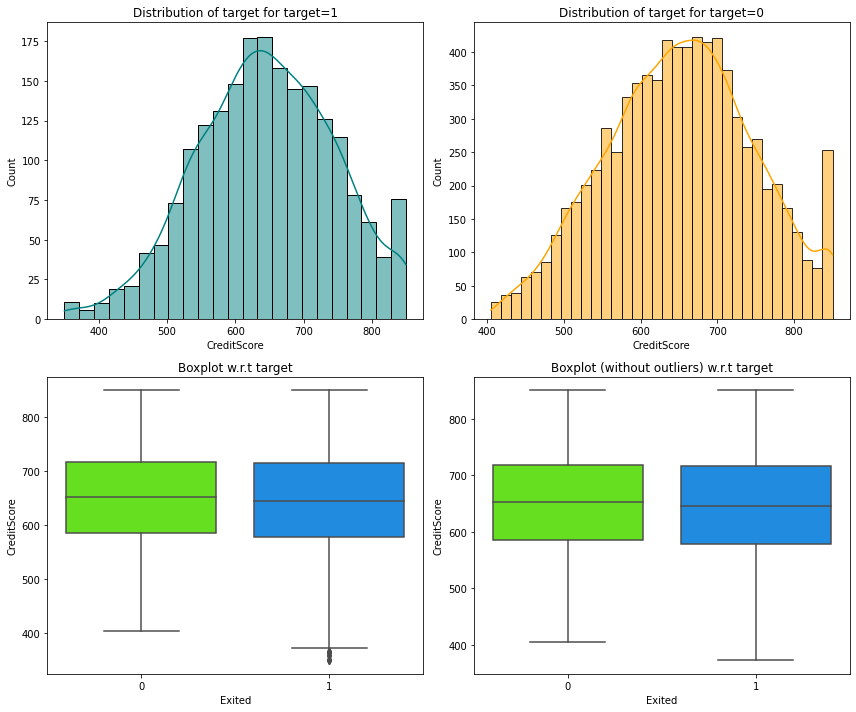

In [ ]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")


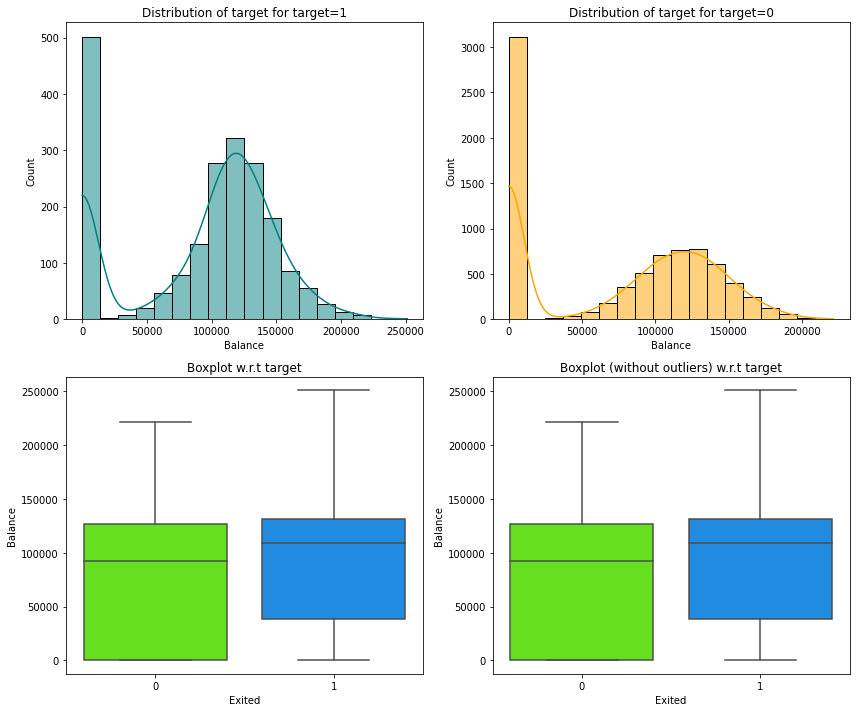

In [ ]:
distribution_plot_wrt_target(Data, "Balance", "Exited")


In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


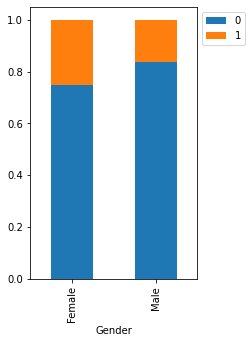

In [ ]:
stacked_barplot(Data, "Gender", "Exited")


Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


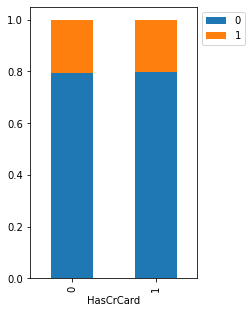

In [ ]:
stacked_barplot(Data, "HasCrCard", "Exited")


Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


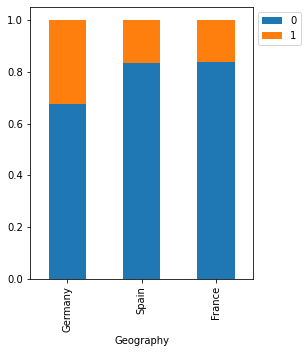

In [ ]:
stacked_barplot(Data, "Geography", "Exited")


Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


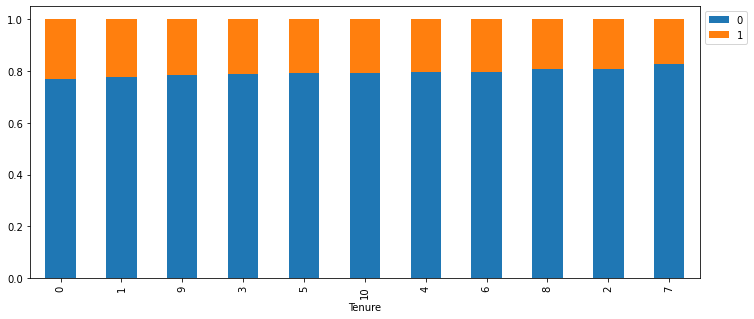

In [ ]:
stacked_barplot(Data, "Tenure", "Exited")


Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


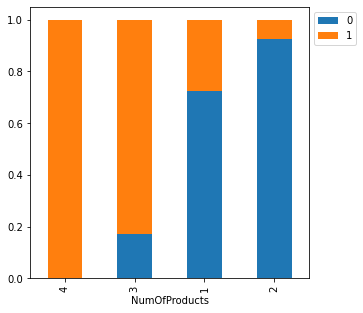

In [ ]:
stacked_barplot(Data, "NumOfProducts", "Exited")


Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


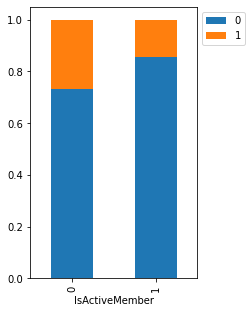

In [ ]:
stacked_barplot(Data, "IsActiveMember", "Exited")


Model Building

In [ ]:
Data.drop(['Geography','Gender'], axis=1, inplace=True)


In [ ]:
cat_col_df = Data.drop(['Tenure','NumOfProducts'], axis=1)


In [ ]:
cat_col_df = Data.drop(['Exited','HasCrCard','IsActiveMember'], axis=1)


In [ ]:
X = Data.drop(['Exited'],axis=1)
Y = Data[['Exited']]


In [ ]:
Y.head()


,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)


In [ ]:
X_train.isnull().sum()


Surname            0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
X_train.head()


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,Walton,753,57,7,0.00,1,1,0,159475.08
8392,Belcher,739,32,3,102128.27,1,1,0,63981.37
5006,Chikere,755,37,0,113865.23,2,1,1,117396.25
4117,Pagnotto,561,37,5,0.00,2,1,0,83093.25
7182,Rhodes,692,49,6,110540.43,2,0,1,107472.99


Encoding Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sr = LabelEncoder()


In [ ]:
labelencoder_LNJ = LabelEncoder()
X_train['Surname']=  labelencoder_LNJ.fit_transform(X_train['Surname'])
X_test['Surname']=  labelencoder_LNJ.fit_transform(X_test['Surname'])

In [ ]:
X_train.head()


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,2466,753,57,7,0.00,1,1,0,159475.08
8392,185,739,32,3,102128.27,1,1,0,63981.37
5006,449,755,37,0,113865.23,2,1,1,117396.25
4117,1885,561,37,5,0.00,2,1,0,83093.25
7182,2035,692,49,6,110540.43,2,0,1,107472.99


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000, 1)
(2000, 1)


Model 1

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 9, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 4s 5ms/step - loss: 81681413157421056.0000 - accuracy: 0.7894 - val_loss: 0.5815 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5588 - accuracy: 0.7953 - val_loss: 0.5368 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5301 - accuracy: 0.7953 - val_loss: 0.5179 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5177 - accuracy: 0.7953 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.7953 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.7953 - val_loss: 0.5029 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5081 - accuracy: 0.7953 - val_loss: 0.5019 - val_accurac

63/63 [==============================] - 0s 3ms/step - loss: 5.7113 - accuracy: 0.7960


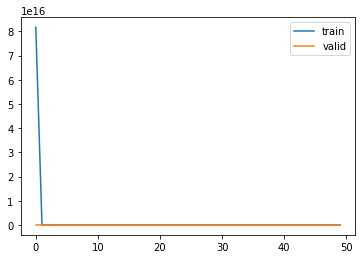

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)


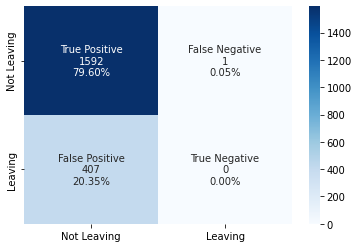

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Model 2

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:

model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 2308.8318 - accuracy: 0.6772 - val_loss: 1772.1819 - val_accuracy: 0.7375
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 1127.2308 - accuracy: 0.6714 - val_loss: 1029.4873 - val_accuracy: 0.4925
Epoch 3/50
100/100 [==============================] - 1s 9ms/step - loss: 640.6356 - accuracy: 0.6803 - val_loss: 278.0416 - val_accuracy: 0.7919
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 642.6503 - accuracy: 0.6758 - val_loss: 614.7062 - val_accuracy: 0.5213
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 376.3719 - accuracy: 0.6762 - val_loss: 120.0358 - val_accuracy: 0.7450
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 439.2139 - accuracy: 0.6800 - val_loss: 348.9243 - val_accuracy: 0.5825
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 312.5473 - accuracy: 0.6767 - val_loss: 399.12

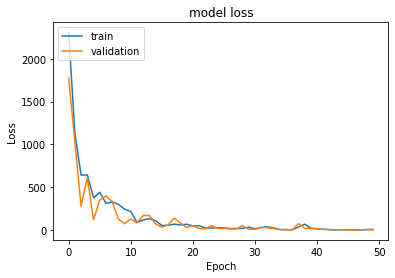

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.053481, G-Mean=0.508


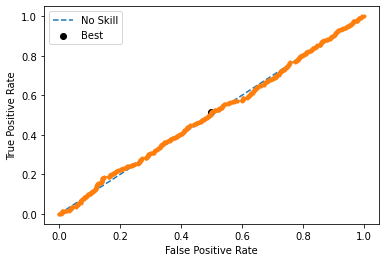

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

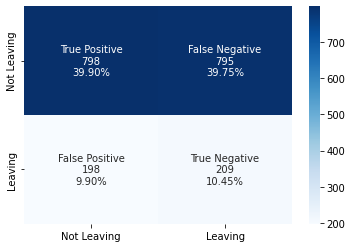

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62      1593
           1       0.21      0.51      0.30       407

    accuracy                           0.50      2000
   macro avg       0.50      0.51      0.46      2000
weighted avg       0.68      0.50      0.55      2000



Model 3

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
100/100 [==============================] - 2s 7ms/step - loss: 0.5234 - accuracy: 0.7806 - val_loss: 0.5329 - val_accuracy: 0.7713
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.7948 - val_loss: 0.5182 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5028 - accuracy: 0.7945 - val_loss: 0.5072 - val_accuracy: 0.7912
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5018 - accuracy: 0.7950 - val_loss: 0.5199 - val_accuracy: 0.7975
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5037 - accuracy: 0.7953 - val_loss: 0.4990 - val_accuracy: 0.7994
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5048 - accuracy: 0.7952 - val_loss: 0.4980 - val_accuracy: 0.7994
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5021 - accuracy: 0.7950 - val_loss: 0.5029 - val_accuracy: 0.7994
Epoch 

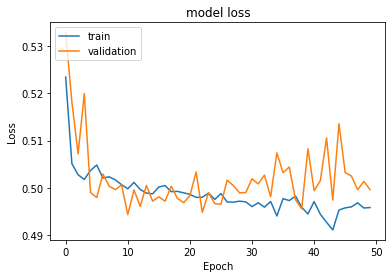

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.204340, G-Mean=0.544


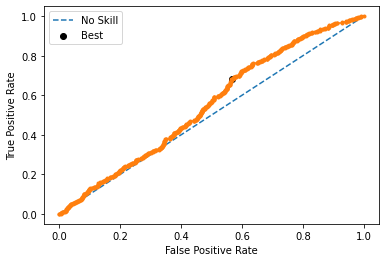

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

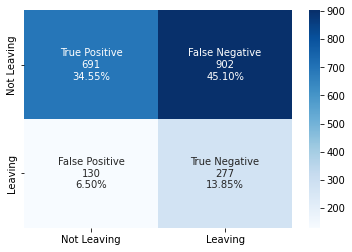

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)


              precision    recall  f1-score   support

           0       0.84      0.43      0.57      1593
           1       0.23      0.68      0.35       407

    accuracy                           0.48      2000
   macro avg       0.54      0.56      0.46      2000
weighted avg       0.72      0.48      0.53      2000



Model 4

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 441.3997 - accuracy: 0.6616 - val_loss: 18.7472 - val_accuracy: 0.7831
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 47.6670 - accuracy: 0.6819 - val_loss: 0.6424 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 10.1100 - accuracy: 0.7084 - val_loss: 1.9490 - val_accuracy: 0.2262
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 4.4301 - accuracy: 0.7323 - val_loss: 0.5473 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 2.5930 - accuracy: 0.7777 - val_loss: 0.5188 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 1.4890 - accuracy: 0.7856 - val_loss: 0.5066 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.9824 - accuracy: 0.7875 - val_loss: 0.5025 - val_accuracy: 0.8000
E

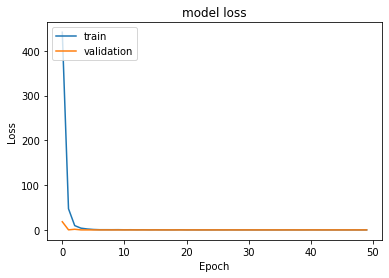

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=1.202591, G-Mean=0.000


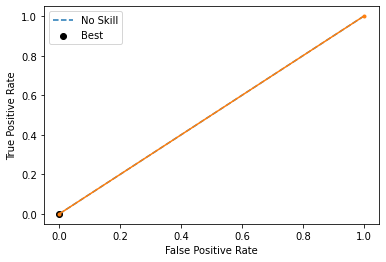

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

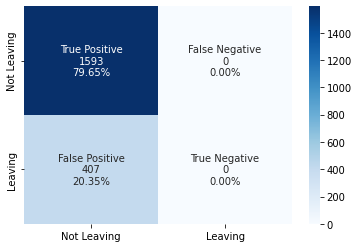

In [ ]:

#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Model 5

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)


In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 264.2553 - accuracy: 0.6797 - val_loss: 1.3867 - val_accuracy: 0.7994
Best: 0.796250 using {'lr': 0.01, 'batch_size': 32}


In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)


Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 362.7777 - accuracy: 0.6873 - val_loss: 0.5553 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3049 - accuracy: 0.7831 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.7906 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7942 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7944 - val_loss: 0.5003 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.7941 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5741 - accuracy: 0.7942 - val_loss: 0.5009 - val_accuracy: 0.8000
Epoc

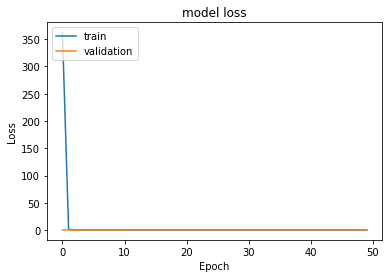

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Best Threshold=1.182054, G-Mean=0.000


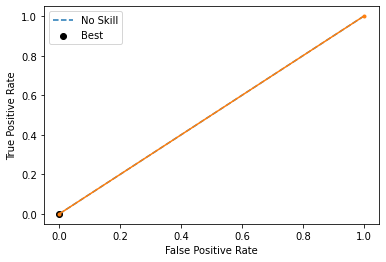

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

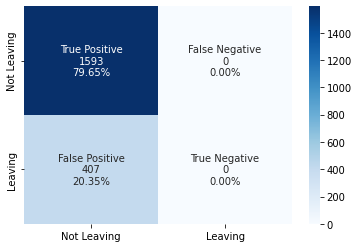

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Model 6

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 264.2553 - accuracy: 0.6797 - val_loss: 1.3867 - val_accuracy: 0.7994
Best: 0.796250 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 41.259482860565186


In [ ]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 362.7777 - accuracy: 0.6873 - val_loss: 0.5553 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3049 - accuracy: 0.7831 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.7906 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7942 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7944 - val_loss: 0.5003 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.7941 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5741 - accuracy: 0.7942 - val_loss: 0.5009 - val_accuracy: 0.8000
Epoc

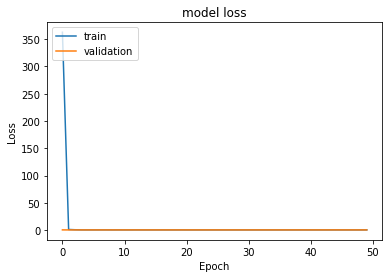

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.180949, G-Mean=0.043


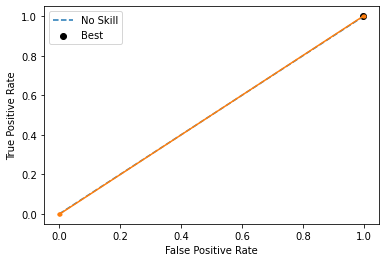

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

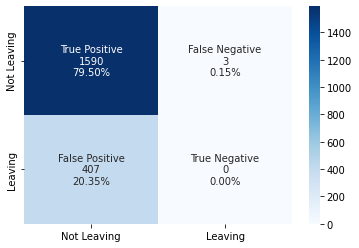

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



In [ ]:
!pip install dask-ml 


     |████████████████████████████████| 148 kB 5.1 MB/s 
     |████████████████████████████████| 837 kB 40.0 MB/s 
     |████████████████████████████████| 134 kB 34.1 MB/s 
     |████████████████████████████████| 830 kB 41.2 MB/s 
     |████████████████████████████████| 822 kB 45.1 MB/s 
     |████████████████████████████████| 802 kB 40.1 MB/s 
     |████████████████████████████████| 802 kB 43.2 MB/s 
     |████████████████████████████████| 793 kB 46.9 MB/s 
     |████████████████████████████████| 793 kB 38.4 MB/s 
     |████████████████████████████████| 791 kB 46.0 MB/s 
     |████████████████████████████████| 786 kB 35.5 MB/s 
     |████████████████████████████████| 779 kB 43.1 MB/s 
     |████████████████████████████████| 778 kB 42.5 MB/s 
     |████████████████████████████████| 776 kB 45.8 MB/s 
     |████████████████████████████████| 769 kB 44.9 MB/s 
     |████████████████████████████████| 766 kB 33.0 MB/s 
     |████████████████████████████████| 1.0 MB 40.9 MB/s 
     |█████████

In [ ]:
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV


In [ ]:

def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

100/100 [==============================] - 1s 7ms/step - loss: 6594.9351 - accuracy: 0.7833 - val_loss: 0.5007 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.1}
Total runtime of the program is 56.41543388366699


In [ ]:
!pip install keras-tuner 


     |████████████████████████████████| 98 kB 3.8 MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

Model 7

In [ ]:

backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()


Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:

### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.7958333293596903

Best val_accuracy So Far: 0.8002083500226339
Total elapsed time: 00h 02m 14s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()


Results summary
Results in ./Job_
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8002083500226339
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7958333293596903
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7956250111262003
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
le

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model7.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
100/100 [==============================] - 2s 10ms/step - loss: 2502.1702 - accuracy: 0.6777 - val_loss: 557.6891 - val_accuracy: 0.7006
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 859.4827 - accuracy: 0.6858 - val_loss: 347.5727 - val_accuracy: 0.7381
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 493.5752 - accuracy: 0.6817 - val_loss: 237.9748 - val_accuracy: 0.7962
Epoch 4/50
100/100 [==============================] - 1s 9ms/step - loss: 248.8095 - accuracy: 0.6762 - val_loss: 366.4414 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 187.0043 - accuracy: 0.6819 - val_loss: 191.2695 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 172.2702 - accuracy: 0.6808 - val_loss: 45.8589 - val_accuracy: 0.5813
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 118.8291 - accuracy: 0.6694 - val_loss: 172.5307 

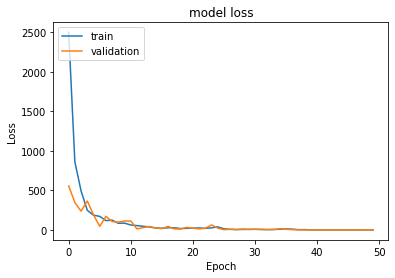

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.396985, G-Mean=0.514


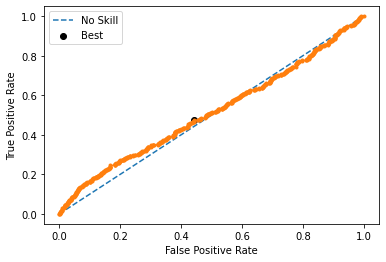

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

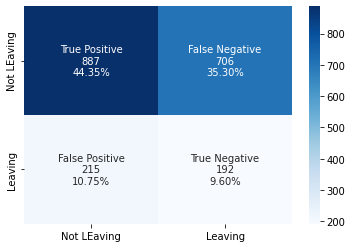

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not LEaving','Leaving']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1593
           1       0.21      0.47      0.29       407

    accuracy                           0.54      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.68      0.54      0.58      2000



In [ ]:

##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)


Model 8

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


In [ ]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')


In [ ]:
tuner_2.search_space_summary()


Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.8169806400934855

Best val_accuracy So Far: 0.9331501921017965
Total elapsed time: 00h 03m 00s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_2.results_summary()


Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.9331501921017965
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8169806400934855
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7097069621086121
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.5811093747615814
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 6

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [ ]:
model9.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [ ]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 1899.3802 - accuracy: 0.5428 - val_loss: 814.2057 - val_accuracy: 0.2131
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 553.7827 - accuracy: 0.5458 - val_loss: 886.1439 - val_accuracy: 0.5432
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 316.7353 - accuracy: 0.5446 - val_loss: 319.6131 - val_accuracy: 0.3850
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 201.6850 - accuracy: 0.5482 - val_loss: 0.0165 - val_accuracy: 0.9988
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 125.4495 - accuracy: 0.5409 - val_loss: 90.1578 - val_accuracy: 0.1405
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 58.2808 - accuracy: 0.5433 - val_loss: 24.4620 - val_accuracy: 0.4137
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 31.4123 - accuracy: 0.5463 - val_loss: 222.9169 - val_

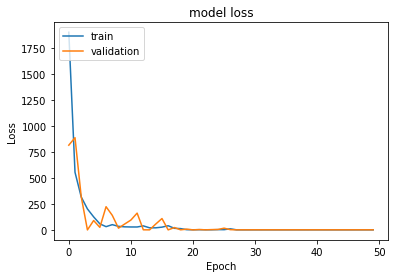

In [ ]:
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Best Threshold=0.372370, G-Mean=0.168


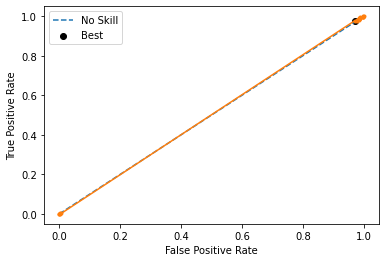

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

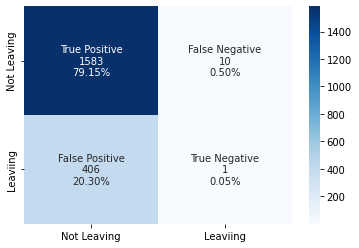

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaviing']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1593
           1       0.09      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.44      0.50      0.44      2000
weighted avg       0.65      0.79      0.70      2000



Model 9

In [ ]:

backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:
 def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)


In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 


Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 12586.5186 - accuracy: 0.7931 - val_loss: 0.5004 - val_accuracy: 0.8000


In [ ]:

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.1}


In [ ]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 3s 6ms/step - loss: 5184.9316 - accuracy: 0.6207 - val_loss: 0.7871 - val_accuracy: 0.0000e+00
Epoch 2/50
319/319 [==============================] - 2s 5ms/step - loss: 0.6628 - accuracy: 0.6251 - val_loss: 0.9596 - val_accuracy: 0.0000e+00
Epoch 3/50
319/319 [==============================] - 2s 5ms/step - loss: 0.6637 - accuracy: 0.6251 - val_loss: 0.9219 - val_accuracy: 0.0000e+00
Epoch 4/50
319/319 [==============================] - 2s 5ms/step - loss: 0.7690 - accuracy: 0.6249 - val_loss: 1.0642 - val_accuracy: 0.0000e+00
Epoch 5/50
319/319 [==============================] - 2s 5ms/step - loss: 0.6630 - accuracy: 0.6250 - val_loss: 1.0235 - val_accuracy: 0.0000e+00
Epoch 6/50
319/319 [==============================] - 2s 5ms/step - loss: 0.6635 - accuracy: 0.6250 - val_loss: 0.9130 - val_accuracy: 0.0000e+00
Epoch 7/50
319/319 [==============================] - 2s 5ms/step - loss: 0.6645 - accuracy: 0.6250 - val_loss: 0.9972 - 

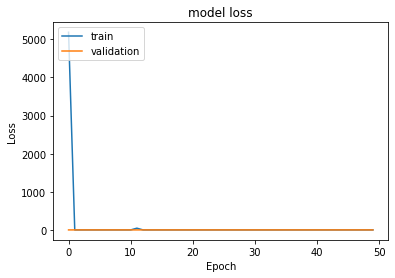

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Best Threshold=1.423355, G-Mean=0.000


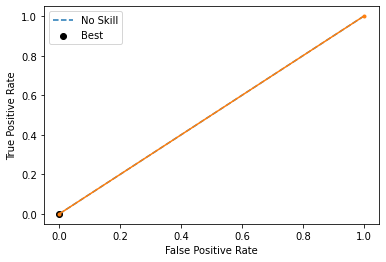

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

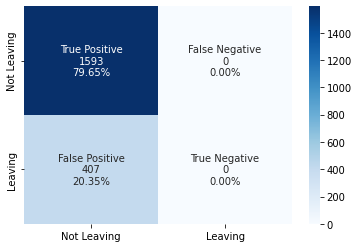

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving','Leaving']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



In [ ]:
##Model 2 performs the best and should be chosen
images=np.load('/content/drive/MyDrive/deep learning/img.npy')
labels=pd.read_csv('/content/drive/MyDrive/deep learning/Labels.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,labels , test_size=0.1, random_state=1,stratify=labels) 

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)



In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model(): 
        # we will be adding the layers sequentially
        model_ann = keras.Sequential([
            # flattening the 3-d output of the conv layer and making it ready for creating dense connections
            keras.layers.Flatten(input_shape=(150,150,1)), 
            # first hidden layer with 500 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu), 
            # second hidden layer with 700 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            # output layer with 4 neuron and softmax as activation function will give the probability of each class   
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        # Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that 
        # we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
model_ann=create_model()
model_ann.summary()


NameError: ignored